# [RecipeBox](https://eightportions.com/datasets/Recipes/)

Analysis of dataset should contain: 
* [Plantuml](https://plantuml.com/de/json) diagram of json structure 
* Amount of recipes
* Plots:
 * Num of Instructions
 * Num of Ingredients
 * Most used words in Instructions
 * Most used words in Ingedients
 * (Optional) Kind of dish


In [1]:
# Import python librarys
import json
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
charsToRemove = "[,.*®©™()?!:;+]"
fractionRegex = re.compile("[0-9]+/[0-9]+")
# Counts words in a given list (ingredients/instructions) and returns their occurence in a dictionary
# Filters numbers (such as 1 apple or 1/2 apple) and puts them into 'numeric' category
def countWords(list, words_dict):
    for elem in list:
        text = elem.strip()
        strippedText = re.sub(charsToRemove, "", text.lower()).replace('advertisement', '')
        for word in strippedText.split():
            if word.isnumeric() or re.match(fractionRegex, word):
                words_dict['numeric'] = words_dict.setdefault('numeric', 0) + 1
            else:
                words_dict[word] = words_dict.setdefault(word, 0) + 1
    return words_dict

In [3]:
# Load data of recipe box
file_ar = open('.recipeBox/recipes_raw_nosource_ar.json')
data_ar = json.load(file_ar)

file_epi = open('.recipeBox/recipes_raw_nosource_epi.json')
data_epi = json.load(file_epi)

file_fn = open('.recipeBox/recipes_raw_nosource_fn.json')
data_fn = json.load(file_fn)

# Join dicts of different websites scraped in recipe box
data = {**data_ar, **data_epi, **data_fn}

In [4]:
# Strip empty entries
data_stripped = {k: v for k, v in data.items() if v}

In [5]:
# Analysis
## Length of the dataset

# Total amount of ingredients and instructions
sumInstructions = 0
sumIngredients = 0
wordsInstructions = {}
wordsIngredients = {}
for value in data_stripped.values():
    sumIngredients = sumIngredients + len(value['ingredients'])
    wordsIngredients = countWords(value['ingredients'], wordsIngredients)
    if value['instructions']:
        sumInstructions = sumInstructions + len(value['instructions'].split("."))
        wordsInstructions = countWords(value['instructions'].split("."), wordsInstructions)
    

print('Amount of recipes: ' + str(len(data_stripped)))
print('Amount of Ingredients: ' + str(sumIngredients))
print('Amount of Instructions: ' + str(sumInstructions))
print('Amount of different words in ingredients: ' + str(len(wordsIngredients)))
print('Amount of numeric expressions in ingredients: ' + str(wordsIngredients["numeric"]))
print('Amount of different words in instructions: ' + str(len(wordsInstructions)))
print('Amount of numeric expressions in instructions: ' + str(wordsInstructions["numeric"]))

Amount of recipes: 124647
Amount of Ingredients: 1316950
Amount of Instructions: 1924048
Amount of different words in ingredients: 22364
Amount of numeric expressions in ingredients: 1369071
Amount of different words in instructions: 40387
Amount of numeric expressions in instructions: 913097


# Ingredients 
## Including numerical category

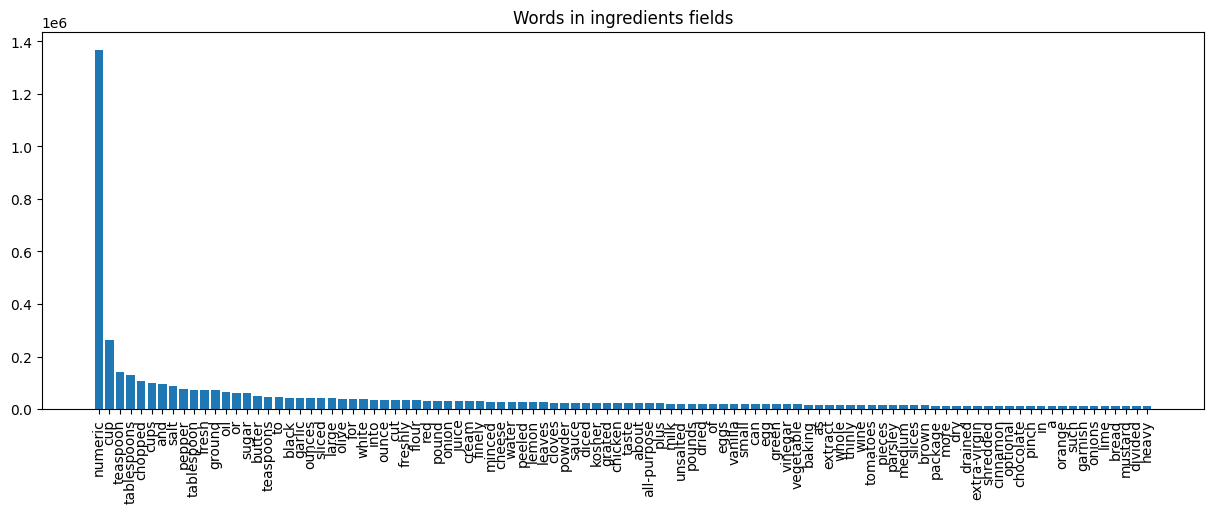

In [6]:
# Plot for ingredients words
# Sort and strip to 100 most used
wordsIngredientsStripped = sorted(wordsIngredients.items(), key=lambda x:x[1], reverse=True)[:101]

wordsIngredientsKeys, wordsIngredientsValues = zip(*wordsIngredientsStripped)
wordsIngredientsKeys = list(wordsIngredientsKeys)
wordsIngredientsValues = list(wordsIngredientsValues)
# Plot
plt.figure(figsize=(15,5), dpi=100, facecolor='w')
plt.title("Words in ingredients fields")
plt.bar(wordsIngredientsKeys[:100], wordsIngredientsValues[:100], align='center')
plt.xticks(rotation='vertical')
plt.show()

## Excluding numerical category

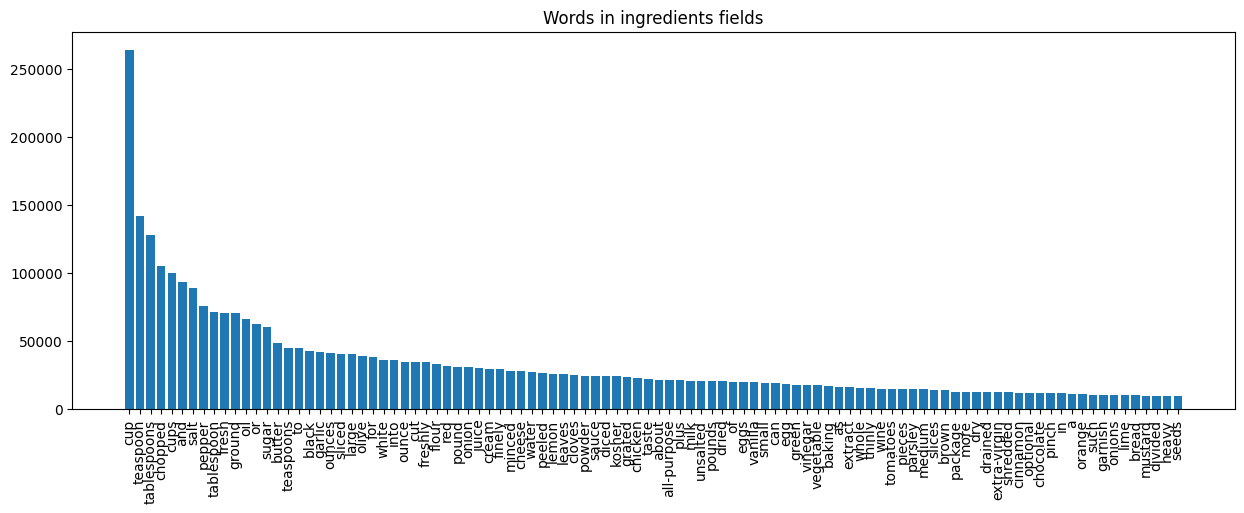

In [7]:
i = wordsIngredientsKeys.index('numeric')
del wordsIngredientsKeys[i]
del wordsIngredientsValues[i]

# Plot
plt.figure(figsize=(15,5), dpi=100, facecolor='w')
plt.title("Words in ingredients fields")
plt.bar(wordsIngredientsKeys, wordsIngredientsValues, align='center')
plt.xticks(rotation='vertical')
plt.show()

# Instructions
## With numerical expressions

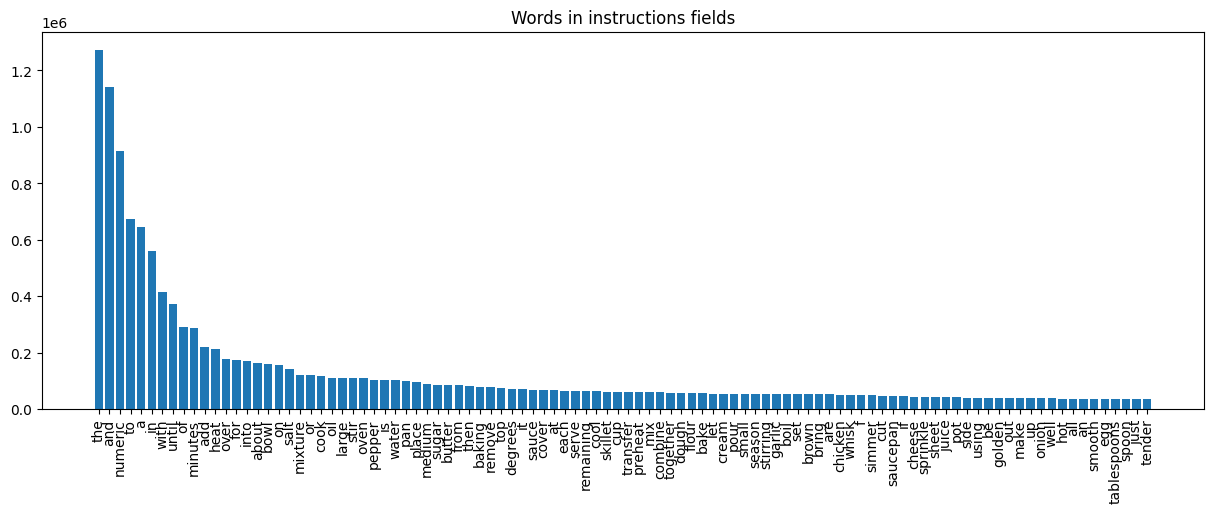

In [8]:
# Plot for instructions words
# Sort and strip to 100 most used
wordsInstructionsStripped = sorted(wordsInstructions.items(), key=lambda x:x[1], reverse=True)[:101]

wordsInstructionsKeys, wordsInstructionsValues = zip(*wordsInstructionsStripped)
wordsInstructionsKeys = list(wordsInstructionsKeys)
wordsInstructionsValues = list(wordsInstructionsValues)
# Plot
plt.figure(figsize=(15,5), dpi=100, facecolor='w')
plt.title("Words in instructions fields")
plt.bar(wordsInstructionsKeys[:100], wordsInstructionsValues[:100], align='center')
plt.xticks(rotation='vertical')
plt.show()

## Without numerical expressions

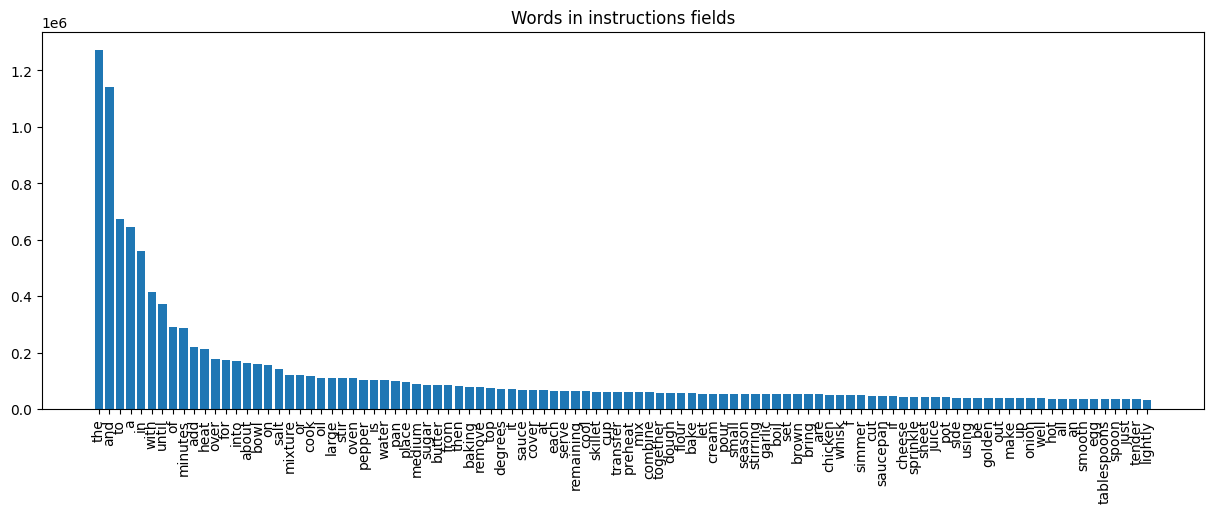

In [9]:
i = wordsInstructionsKeys.index('numeric')
del wordsInstructionsKeys[i]
del wordsInstructionsValues[i]

# Plot
plt.figure(figsize=(15,5), dpi=100, facecolor='w')
plt.title("Words in instructions fields")
plt.bar(wordsInstructionsKeys, wordsInstructionsValues, align='center')
plt.xticks(rotation='vertical')
plt.show()

# Initial parsing of ingredients and units separately

In [10]:
# Unit strings
units = list(
    ['ounce', 'teaspoon', 'tablespoon', 'cup', 'can']
)

unitString = ''
for string in units:
    if unitString != '':
        unitString = unitString + '|'
    unitString = unitString + string

print(unitString)

ounce|teaspoon|tablespoon|cup|can


In [11]:
# Occurence of different ingredients 
ingredientsDict = {}

for value in data_stripped.values():
    for ingredient in value['ingredients']:
        charsToRemove = ",*®©™()"
        ingredientStripped = re.sub("[" + charsToRemove + "]", "", ingredient.lower()).replace('[', '').replace(']','').replace('advertisement', '')
        #print(ingredientStripped)
        regex = r"([0-9|\.]*)\s(" + unitString + ")*(?:s\s)*([a-z|\s]*)"
        # ([0-9|\.]*)|(\s(teaspoon|ounce)*)|([a-z|\s]*)
        #print(regex)
        matchs = re.findall(regex, ingredientStripped)
        #print(matchs)
        items = []
        for match in matchs:
            for item in match:
                items.append(item)
        for word in items:
            if word.isnumeric():
                ingredientsDict['numeric'] = ingredientsDict.setdefault('numeric', 0) + 1
            else:
                ingredientsDict[word] = ingredientsDict.setdefault(word, 0) + 1


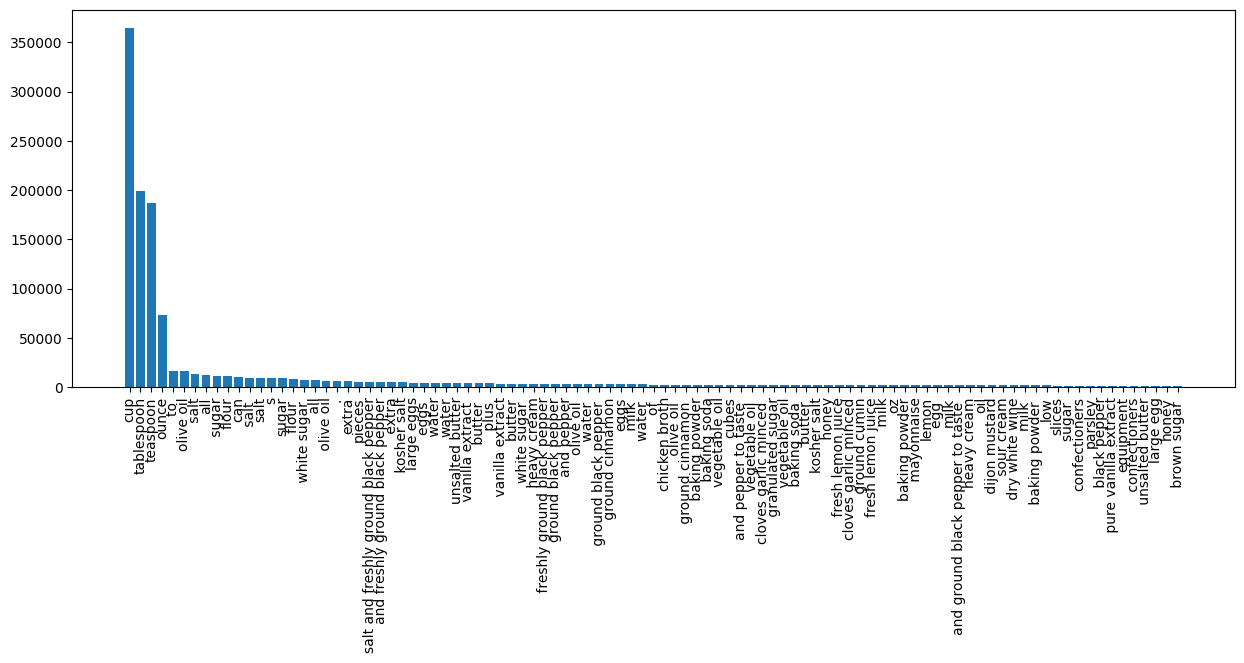

In [16]:
# Sort the occurences of the ingredients in descending order
sortedIngredientsList = sorted(ingredientsDict.items(), key=lambda x:x[1], reverse=True)
ingrStripped, valueStripped = zip(*sortedIngredientsList)
# Plot first 100 of the most occuring ingredients
ingrStripped = list(ingrStripped)[:100]
valueStripped = list(valueStripped)[:100]

i = ingrStripped.index('numeric')
del ingrStripped[i]
del valueStripped[i]
i = ingrStripped.index(' ')
del ingrStripped[i]
del valueStripped[i]
i = ingrStripped.index('')
del ingrStripped[i]
del valueStripped[i]

plt.figure(figsize=(15,5), dpi=100, facecolor='w')
plt.bar(ingrStripped, valueStripped, align='center')
plt.xticks(rotation='vertical')
plt.show()